## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
 

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [2]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv)
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv)
    X = data[data.columns.difference(["target"])]
    y = data["target"]
    return X, y

In [3]:
COVID_DATA_PATH = "hw1_data/covid.csv"
HR_DATA_PATH = "hw1_data/hr.csv"

In [4]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

In [5]:
X_hr.columns

Index(['city', 'city_development_index', 'company_size', 'company_type',
       'education_level', 'enrolled_university', 'enrollee_id', 'experience',
       'gender', 'last_new_job', 'major_discipline', 'relevent_experience',
       'training_hours'],
      dtype='object')

In [6]:
categorial_columns = ['city','gender','relevent_experience','enrolled_university', 'education_level','major_discipline','relevent_experience', 'company_size', 'company_type', 'experience','last_new_job' ]
numerical_columns = ['city_development_index', 'training_hours' ]

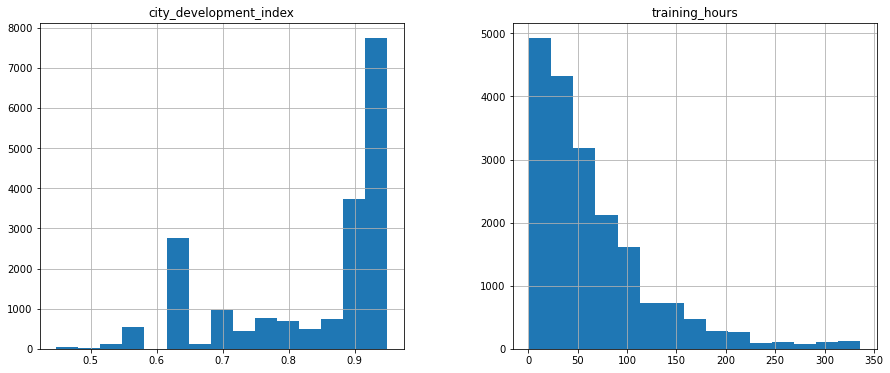

In [7]:
# ttps://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
 

X_hr[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(1, 2));

In [8]:
for column in categorial_columns:
    print(X_hr[column].value_counts() )

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_111       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
50-99        3083
100-500  

In [9]:
y_hr.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [10]:
y_hr.shape

(19158,)

In [11]:
X_hr.isna().sum()

city                         0
city_development_index       0
company_size              5938
company_type              6140
education_level            460
enrolled_university        386
enrollee_id                  0
experience                  65
gender                    4508
last_new_job               423
major_discipline          2813
relevent_experience          0
training_hours               0
dtype: int64

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [12]:
hr_size = X_hr.shape[0]
print(f'Исходный размер датасета hr {hr_size}')

Исходный размер датасета hr 19158


In [13]:
X_hr_dropna = X_hr.dropna()

new_hr_size = X_hr_dropna.shape[0]

In [14]:
y_drop_na = y_hr.dropna()

y_drop_na.size

19158

In [15]:
print(f'Pазмер датасета covid без NaN {new_hr_size}')

Pазмер датасета covid без NaN 8955


In [16]:
hr_size/new_hr_size

2.1393634840871023

Размер выборки уменьшился в более, чем два раза

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [17]:
y_hr.index

RangeIndex(start=0, stop=19158, step=1)

In [18]:
y_hr[X_hr[['last_new_job', 'experience', 'education_level', 'enrolled_university']].isna().sum(axis=1)==1].index


Int64Index([    3,    39,    58,    62,    64,    90,   136,   153,   180,
              205,
            ...
            19091, 19095, 19100, 19106, 19109, 19113, 19118, 19120, 19139,
            19142],
           dtype='int64', length=973)

In [19]:
y_hr[X_hr[['last_new_job', 'experience', 'education_level', 'enrolled_university']].isna().sum(axis=1)].index

Int64Index([0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', length=19158)

In [20]:
def fill_na(X, y):
    # Возвращает данные без NaN значений
    X_fill = X.copy()
    
    #Распределение относительно плавное 
    X_fill["training_hours"].fillna((X["training_hours"].mean()), inplace = True )

    #Выбрала, потому что есть "дыры"
    X_fill["city_development_index"].fillna((X["city_development_index"].median() ), inplace = True  )
    
    #Тут не потеряется больш 10% датасета
    rows = y[X_fill[['last_new_job', 'experience', 'education_level', 'enrolled_university']].isna().sum(axis=1)==1 ].index
  

    print(len(rows))
    X_fill = X_fill.dropna(subset=['last_new_job', 'experience', 'education_level', 'enrolled_university'])
   
    y_fill = y.copy()
    y_fill.fillna((y.mode()[0]))#на деле не нужно
    #y_fill.iloc[rows,]
    y_fill.drop(rows, inplace = True )
    
    #Субъективно, но крайне важные признаки при трудоустройстве,
    #которые опасно менять на медиану 
    
    
    #ПОтом решила оставить это в части с Encode 
    #X_fill['NanMajor'] = X_fill['major_discipline'].isnull()*1
    #X_fill['NanGender'] = X_fill['gender'].isnull()*1
    
    categorial_columns = ['relevent_experience',  'company_size', 'company_type' ]

    
    for column in categorial_columns:
        X_fill[column].fillna((X[column].mode()[0] ), inplace = True )
        
 
    
    return X_fill, y_fill

In [42]:
X_hr.shape, y_hr.shape

((19158, 13), (19158,))

In [21]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

973


/home/kamilla/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kamilla/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kamilla/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

[[<AxesSubplot:xlabel='relevent_experience', ylabel='count'>
  <AxesSubplot:xlabel='relevent_experience', ylabel='count'>]
 [<AxesSubplot:xlabel='company_size', ylabel='count'>
  <AxesSubplot:xlabel='company_size', ylabel='count'>]
 [<AxesSubplot:xlabel='company_type', ylabel='count'>
  <AxesSubplot:xlabel='company_type', ylabel='count'>]]


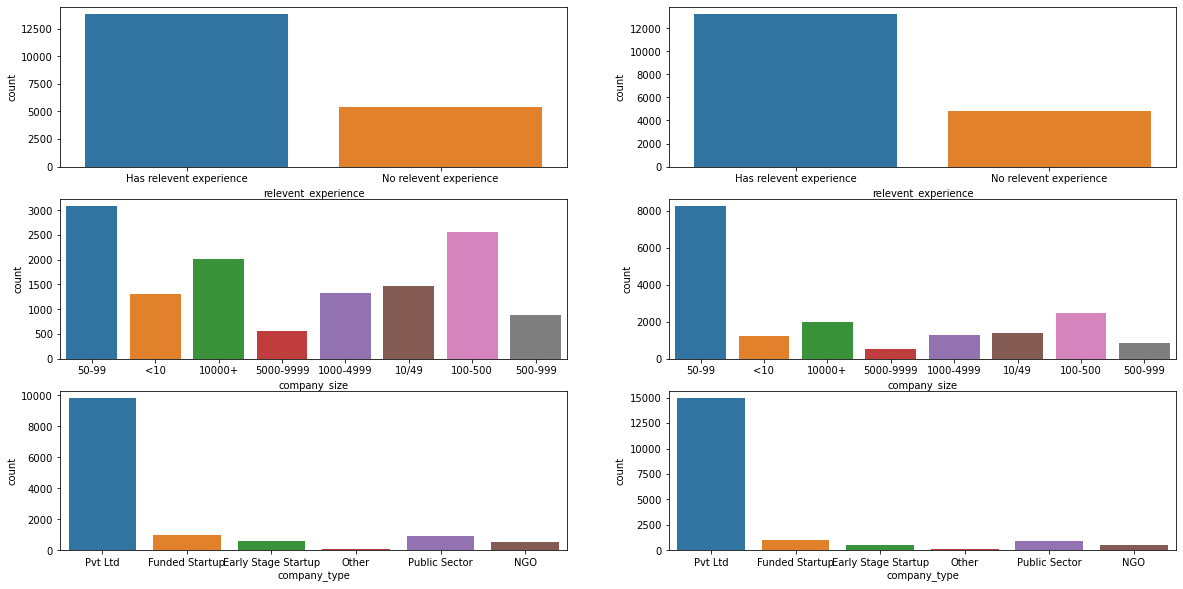

In [22]:
 
tomode_columns = ['relevent_experience',  'company_size', 'company_type' ]

fig, ax = plt.subplots(3, 2, figsize=(20, 10)) 
i = 0
for variable, subplot in zip(tomode_columns, ax.flatten()):

    sns.countplot(X_hr[variable], ax= ax.flatten()[2*i] )
    sns.countplot(X_hr_fill[variable], ax = ax.flatten()[2*i+1])
    
    i=i+1
    
print(ax)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

Для численных ничего не поменялось, так как там не было пропущенных значений (для целевого вектора аналогично).

Типы компаний сильно усреднились

In [23]:
X_hr_fill.isna().sum()

city                         0
city_development_index       0
company_size                 0
company_type                 0
education_level              0
enrolled_university          0
enrollee_id                  0
experience                   0
gender                    3863
last_new_job                 0
major_discipline          2222
relevent_experience          0
training_hours               0
dtype: int64

In [24]:
X_hr_fill.shape, y_hr_fill.shape

((18014, 13), (18185,))

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [25]:
X_covid["country"].value_counts()[X_covid["country"].value_counts()==46]

Bahrain    46
Name: country, dtype: int64

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

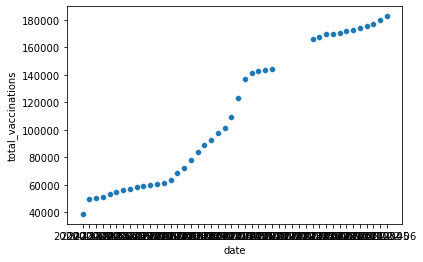

In [26]:
sns.scatterplot(x=X_covid[X_covid["country"]=="Bahrain"]["date"], y=X_covid[X_covid["country"]=="Bahrain"]["total_vaccinations"])

In [27]:
X_covid.at[107, "total_vaccinations"]

nan

In [28]:
x1 = X_covid[X_covid["country"]=="Bahrain"]["total_vaccinations"][106]
x2 = X_covid[X_covid["country"]=="Bahrain"]["total_vaccinations"][112]
k = (x2-x1)/6

for i in range(107, 113):
    X_covid.at[i, "total_vaccinations"] = X_covid.at[i-1, "total_vaccinations"]+k

<AxesSubplot:xlabel='date', ylabel='total_vaccinations'>

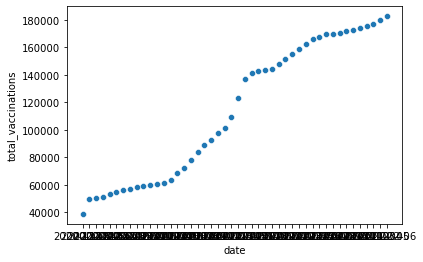

In [29]:
sns.scatterplot(x=X_covid[X_covid["country"]=="Bahrain"]["date"], y=X_covid[X_covid["country"]=="Bahrain"]["total_vaccinations"])

Выбрала замену с линейным ростом, так как явно предполагается рост числа вакцинаций со временем 

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


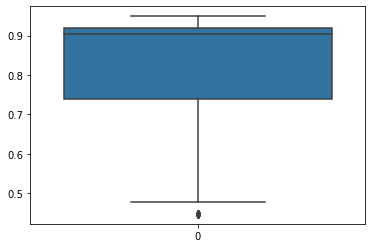

In [30]:
ax = sns.boxplot(data=X_hr["city_development_index"])

В данных с индексом развития города предполагаю выбросы среди наименьших значений. 
Из распределения видно, что наименьшие значения находятся отдаленно от общей массы значений. 

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [31]:
def encode(X):
    # Возвращает данные без категориальных признаков
    X_encode = X.copy()
    
    #два признака
    le = LabelEncoder() 
    X_encode['relevent_experience']= X_encode['relevent_experience'].astype(str) 
    X_encode['relevent_experience'] = le.fit_transform(X_encode['relevent_experience']) 
    
    # Для городов  frequency encoding 
    #предполагаю, что будет важно именно частота городов
    encoding = X_encode.groupby('city').size()
    encoding = encoding/X_encode.shape[0]  
    X_encode['enc_city'] = X_encode["city"].map(encoding)
    X_encode =X_encode.drop(["city"], axis = 1) 
    
    #Предполагается ранжирование в категориях
    #У меня могут быть проблемы с корректностью ранжирования
    le = LabelEncoder() 
    X_encode['education_level']= X_encode['education_level'].astype(str) 
    X_encode['education_level'] = le.fit_transform(X_encode['education_level']) 
    
    X_encode['company_size']= X_encode['company_size'].astype(str) 
    X_encode['company_size'] = le.fit_transform(X_encode['company_size'])     
    
    X_encode['enrolled_university']= X_encode['enrolled_university'].astype(str) 
    X_encode['enrolled_university'] = le.fit_transform(X_encode['enrolled_university'])
    
    X_encode['company_type']= X_encode['company_type'].astype(str) 
    X_encode['company_type'] = le.fit_transform(X_encode['company_type'])
    
    X_encode['last_new_job']= X_encode['last_new_job'].astype(str) 
    X_encode['last_new_job'] = le.fit_transform(X_encode['last_new_job'])
    
    X_encode['experience']= X_encode['experience'].astype(str) 
    X_encode['experience'] = le.fit_transform(X_encode['experience'])  
  
    #One hot encoder для Major
    #Не предполагаю ранживарования в профиле, но предполагаю важность соответствия
    #между компанией и соискателем 
    #https://www.geeksforgeeks.org/feature-encoding-techniques-machine-learning/
    #https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
    
    # use pd.concat to join the new columns with your original dataframe
    X_encode = pd.concat([X_encode,pd.get_dummies(X_encode['major_discipline'], prefix='major_discipline')],axis=1)
    # now drop the original 'country' column (you don't need it anymore)
    X_encode.drop(['major_discipline'],axis=1, inplace=True)
    
    
    X_encode = pd.concat([X_encode,pd.get_dummies(X_encode['gender'], prefix='gender')],axis=1)
    X_encode.drop(['gender'],axis=1, inplace=True)
 
    return X_encode

In [32]:
X_hr_fill["enrolled_university"].count()

18014

In [33]:
X_hr_fill["relevent_experience"].value_counts()

Has relevent experience    13190
No relevent experience      4824
Name: relevent_experience, dtype: int64

In [34]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode.head()

,city_development_index,company_size,company_type,education_level,enrolled_university,enrollee_id,experience,last_new_job,relevent_experience,training_hours,enc_city,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,gender_Female,gender_Male,gender_Other
0,0.920,4,5,0,2,8949,21,0,0,36,0.232819,0,0,0,0,0,1,0,1,0
1,0.776,4,5,0,2,29725,6,4,1,47,0.003497,0,0,0,0,0,1,0,1,0
2,0.624,4,5,0,0,11561,15,5,1,83,0.136227,0,0,0,0,0,1,0,0,0
4,0.767,4,1,2,2,666,21,3,0,8,0.006384,0,0,0,0,0,1,0,1,0
5,0.764,4,5,0,1,21651,2,0,0,24,0.001110,0,0,0,0,0,1,0,0,0


In [35]:
X_hr_encode["relevent_experience"].value_counts()

0    13190
1     4824
Name: relevent_experience, dtype: int64

_Ваш ответ_

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [36]:
#Installing imblearn
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /home/kamilla/anaconda3/lib/python3.8/site-packages (0.7.0)


In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
X_hr_encode.shape, y_hr_fill.shape

((18014, 20), (18185,))

In [39]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    #https://www.roelpeters.be/undersampling-a-pandas-dataframe/
    X_under = X.copy()
    y_under = y.copy()
    y_min = y[y == 1]
    y_max = y[y != 1]
    X_min = X_under.filter(y_min.index,axis = 0)
    X_max = X_under.filter(y_max.index,axis = 0)

    rows = np.random.choice(np.arange(0,len(X_under.index)), y_min.size )
    X_under, y_under = X_under.iloc[rows,], y_under.iloc[rows,]
    
    X_under= pd.concat([X_under, X_min])
    y_under = pd.concat([y_under, y_min])

    
    
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом oversampling
    X_over = X.copy()
    y_over = y.copy()
    
    ros = RandomOverSampler(random_state=0)
    ros.fit(X_over, y_over)
    X_over, y_over = ros.sample(X_over, y_over)
    return X_over, y_over

In [40]:
X_hr_encode.shape, y_hr_fill.shape

((18014, 20), (18185,))

In [41]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

ValueError: Found input variables with inconsistent numbers of samples: [18014, 18185]

In [ ]:
y_hr_under.value_counts()

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = # YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [ ]:
# YOUR CODE

_Ваш ответ_